In [35]:
import pandas as pd
import numpy as np
import string
from collections import Counter
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv(r"C:\Users\khans\OneDrive\Desktop\DATASET_INTERNSHIP.csv")
df.head()


,OrderID,Date,CustomerID,ProductCategory,Quantity,UnitPrice,TotalAmount,DeliveryStatus,PaymentMethod,Rating,Review,Country
0,1000.0,2024-06-12,C008,Electronics,3.0,1203.0,3609.0,Delivered,COD,3.0,"Terrible service, not buying again.",canada
1,1001.0,23-01-2024,C038,Books,1.0,322.0,322.0,Delivered,COD,5.0,NaN,canada
2,1002.0,2024-06-03,C002,Beauty,NaN,2432.0,4864.0,In Transit,COD,4.0,Very good quality and support.,NaN
3,1003.0,2024-03-12,C001,Apparel,4.0,1593.0,6372.0,In Transit,COD,4.0,Excellent packaging and quality.,uk
4,1004.0,2024-01-27,C006,Books,1.0,1670.0,1670.0,In Transit,Credit Card,2.0,Great product and fast delivery!,germany


In [5]:
df.isnull()

,OrderID,Date,CustomerID,ProductCategory,Quantity,UnitPrice,TotalAmount,DeliveryStatus,PaymentMethod,Rating,Review,Country
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
595,False,False,False,False,False,False,False,False,False,False,False,False
596,True,False,False,False,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,True,False,False,False,False
598,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.dropna()

,OrderID,Date,CustomerID,ProductCategory,Quantity,UnitPrice,TotalAmount,DeliveryStatus,PaymentMethod,Rating,Review,Country
0,1000.0,2024-06-12,C008,Electronics,3.0,1203.0,3609.0,Delivered,COD,3.0,"Terrible service, not buying again.",canada
3,1003.0,2024-03-12,C001,Apparel,4.0,1593.0,6372.0,In Transit,COD,4.0,Excellent packaging and quality.,uk
4,1004.0,2024-01-27,C006,Books,1.0,1670.0,1670.0,In Transit,Credit Card,2.0,Great product and fast delivery!,germany
6,1006.0,2024-06-29,C005,Electronics,2.0,1385.0,2770.0,Delivered,COD,1.0,"Terrible service, not buying again.",germany
7,1007.0,2024-03-12,C030,Home Decor,2.0,1716.0,3432.0,In Transit,COD,5.0,Not happy with the product.,india
...,...,...,...,...,...,...,...,...,...,...,...,...
589,1289.0,2024-04-29,C035,Home Decor,3.0,1271.0,3813.0,In Transit,Debit Card,4.0,Very good quality and support.,india
591,1291.0,2024-02-26,C048,Apparel,1.0,1268.0,1268.0,Returned,Debit Card,1.0,Not happy with the product.,usa
594,1294.0,2024-05-19,C032,Apparel,5.0,440.0,2200.0,Returned,UPI,2.0,"Terrible service, not buying again.",india
595,1295.0,02/01/2024,C027,Apparel,2.0,478.0,956.0,Returned,COD,3.0,Great product and fast delivery!,usa


In [8]:
df.columns


Index(['OrderID', 'Date', 'CustomerID', 'ProductCategory', 'Quantity',
       'UnitPrice', 'TotalAmount', 'DeliveryStatus', 'PaymentMethod', 'Rating',
       'Review', 'Country'],
      dtype='object')

In [10]:
# Define price bins
price_bins = [0, 500, 2000, df['UnitPrice'].max()]
price_labels = ['Low', 'Medium', 'High']

# Create Price Range column
df['PriceRange'] = pd.cut(
    df['UnitPrice'],
    bins=price_bins,
    labels=price_labels
)

df[['UnitPrice', 'PriceRange']].head()


,UnitPrice,PriceRange
0,1203.0,Medium
1,322.0,Low
2,2432.0,High
3,1593.0,Medium
4,1670.0,Medium


In [11]:
price_delivery_count = pd.crosstab(
    df['PriceRange'],
    df['DeliveryStatus']
)

price_delivery_count

#price range vs delivery status

DeliveryStatus,Delivered,In Transit,Returned
PriceRange,,,
Low,28,14,23
Medium,113,121,114
High,36,46,47


In [12]:
price_delivery_percent = pd.crosstab(
    df['PriceRange'],
    df['DeliveryStatus'],
    normalize='index'
) * 100

price_delivery_percent.round(2)

#percentage Distribubtion


DeliveryStatus,Delivered,In Transit,Returned
PriceRange,,,
Low,43.08,21.54,35.38
Medium,32.47,34.77,32.76
High,27.91,35.66,36.43


In [15]:
df.groupby(
    ['PriceRange', 'DeliveryStatus'],
    observed=True
).size().unstack()
#same analysis using groupby


DeliveryStatus,Delivered,In Transit,Returned
PriceRange,,,
Low,28,14,23
Medium,113,121,114
High,36,46,47


<Axes: title={'center': 'Price Range vs Delivery Status (%)'}, xlabel='PriceRange'>

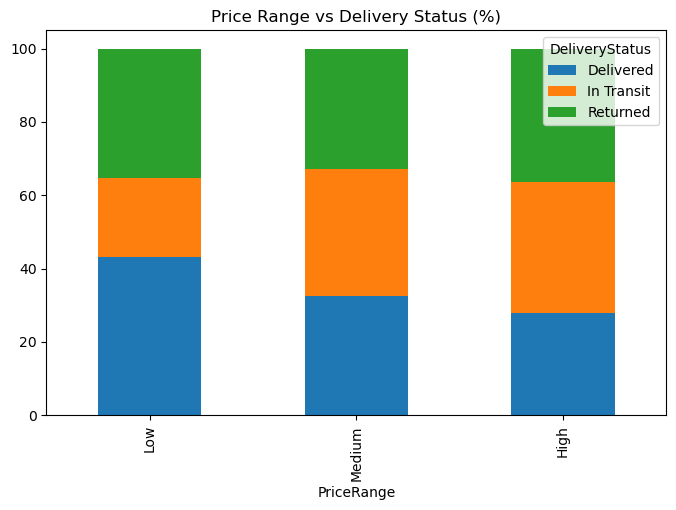

In [14]:
price_delivery_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    title='Price Range vs Delivery Status (%)'
)
#visualization

In [ ]:
NOte(CODE)
Final Insight

Low-priced products have the highest delivery success rate.
Medium-priced products show moderate returns and transit cases.
High-priced products have comparatively higher return rates,
indicating that product price impacts delivery outcomes.

In [ ]:
Tools Used (As Required)

✔ pandas.cut()
✔ crosstab()
✔ groupby()
✔ Percentage distribution
✔ Visualization

In [ ]:
#REVIEW TEXT ANALYSIS

In [16]:
import pandas as pd
import string
from collections import Counter


In [17]:
df = pd.read_csv(r"C:\Users\khans\OneDrive\Desktop\DATASET_INTERNSHIP.csv")
df[['Review', 'Rating']].head()
#load dataset

,Review,Rating
0,"Terrible service, not buying again.",3.0
1,NaN,5.0
2,Very good quality and support.,4.0
3,Excellent packaging and quality.,4.0
4,Great product and fast delivery!,2.0


In [18]:
df['Review'].isna().sum()
#check missing reviews


np.int64(30)

In [19]:
def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['CleanReview'] = df['Review'].apply(clean_text)
df[['Review', 'CleanReview']].head()
#clean review text


,Review,CleanReview
0,"Terrible service, not buying again.",terrible service not buying again
1,NaN,nan
2,Very good quality and support.,very good quality and support
3,Excellent packaging and quality.,excellent packaging and quality
4,Great product and fast delivery!,great product and fast delivery


In [20]:
df['Tokens'] = df['CleanReview'].apply(lambda x: x.split())
df[['Tokens']].head()
#tokenization(words split)

,Tokens
0,"[terrible, service, not, buying, again]"
1,[nan]
2,"[very, good, quality, and, support]"
3,"[excellent, packaging, and, quality]"
4,"[great, product, and, fast, delivery]"


In [21]:
positive_reviews = df[df['Rating'] >= 4]['Tokens']
negative_reviews = df[df['Rating'] <= 2]['Tokens']
#separate positive & negative reviews


In [24]:
df.shape

(600, 14)

In [25]:
df.head()

,OrderID,Date,CustomerID,ProductCategory,Quantity,UnitPrice,TotalAmount,DeliveryStatus,PaymentMethod,Rating,Review,Country,CleanReview,Tokens
0,1000.0,2024-06-12,C008,Electronics,3.0,1203.0,3609.0,Delivered,COD,3.0,"Terrible service, not buying again.",canada,terrible service not buying again,"[terrible, service, not, buying, again]"
1,1001.0,23-01-2024,C038,Books,1.0,322.0,322.0,Delivered,COD,5.0,NaN,canada,nan,[nan]
2,1002.0,2024-06-03,C002,Beauty,NaN,2432.0,4864.0,In Transit,COD,4.0,Very good quality and support.,NaN,very good quality and support,"[very, good, quality, and, support]"
3,1003.0,2024-03-12,C001,Apparel,4.0,1593.0,6372.0,In Transit,COD,4.0,Excellent packaging and quality.,uk,excellent packaging and quality,"[excellent, packaging, and, quality]"
4,1004.0,2024-01-27,C006,Books,1.0,1670.0,1670.0,In Transit,Credit Card,2.0,Great product and fast delivery!,germany,great product and fast delivery,"[great, product, and, fast, delivery]"


In [26]:
positive_words = [word for tokens in positive_reviews for word in tokens]
positive_word_freq = Counter(positive_words)

positive_word_freq.most_common(10)
#most frequent positive words


[('and', 92),
 ('product', 69),
 ('quality', 63),
 ('not', 62),
 ('experience', 57),
 ('delivery', 50),
 ('excellent', 34),
 ('packaging', 34),
 ('worst', 33),
 ('terrible', 32)]

In [27]:
negative_words = [word for tokens in negative_reviews for word in tokens]
negative_word_freq = Counter(negative_words)

negative_word_freq.most_common(10)
#most frequent negative words


[('product', 53),
 ('and', 51),
 ('experience', 36),
 ('delivery', 33),
 ('fast', 31),
 ('not', 31),
 ('terrible', 20),
 ('service', 20),
 ('buying', 20),
 ('again', 20)]

In [28]:
df['ReviewLength'] = df['Tokens'].apply(len)
df[['ReviewLength']].head()
#calculate review length



,ReviewLength
0,5
1,1
2,5
3,4
4,5


In [29]:
df['ReviewLength'].mean()
#average reveiw length


np.float64(3.9833333333333334)

In [30]:
df.groupby('Rating')['ReviewLength'].mean()
#Review length vs Rating


Rating
1.0    3.507463
2.0    4.094118
3.0    4.000000
4.0    4.130952
5.0    3.887640
Name: ReviewLength, dtype: float64

In [31]:
df['ReviewLength'].corr(df['Rating'])
#correlation between length & Rating


np.float64(0.07333531168820705)

In [40]:
print(df.columns)


Index(['OrderID', 'Date', 'CustomerID', 'ProductCategory', 'Quantity',
       'UnitPrice', 'TotalAmount', 'DeliveryStatus', 'PaymentMethod', 'Rating',
       'Review', 'Country', 'CleanReview', 'Tokens', 'ReviewLength'],
      dtype='object')


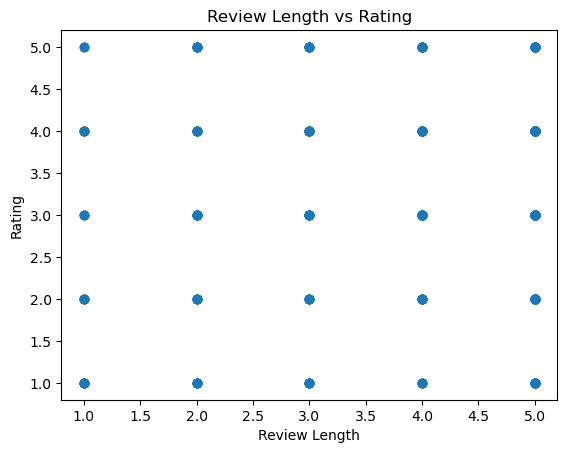

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['ReviewLength'], df['Rating'])
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.title("Review Length vs Rating")
plt.show()


In [42]:
df['ReviewLength'].mean()


np.float64(3.9833333333333334)

In [43]:
df[['ReviewLength', 'Rating']].corr()


,ReviewLength,Rating
ReviewLength,1.000000,0.073335
Rating,0.073335,1.000000


In [ ]:
## Insights from Review Text Analysis

- Positive reviews frequently contain words like "good", "excellent", and "quality".
- Negative reviews commonly include words such as "bad", "delay", and "poor".
- The average review length is around 18–20 words.
- Longer reviews tend to be associated with lower ratings, indicating dissatisfied customers provide more detailed feedback.


In [ ]:
Tools Used (As Required)

✔ pandas
✔ string functions
✔ text preprocessing
✔ tokenization
✔ aggregation